In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-production-statistics-india/APY.csv


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../input/crop-production-statistics-india/APY.csv')
df

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [6]:
df.isnull().sum()

State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340383 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       340383 non-null  object 
 1   District    340383 non-null  object 
 2   Crop        340383 non-null  object 
 3   Crop_Year   340383 non-null  int64  
 4   Season      340383 non-null  object 
 5   Area        340383 non-null  float64
 6   Production  340383 non-null  float64
 7   Yield       340383 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 23.4+ MB


In [10]:
df[df['Production'] !=0]

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340383 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       340383 non-null  object 
 1   District    340383 non-null  object 
 2   Crop        340383 non-null  object 
 3   Crop_Year   340383 non-null  int64  
 4   Season      340383 non-null  object 
 5   Area        340383 non-null  float64
 6   Production  340383 non-null  float64
 7   Yield       340383 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 23.4+ MB


In [12]:
df['Crop_Year'].unique() #finding the years of the data

array([2007, 2008, 2009, 2000, 2001, 2002, 2003, 2004, 2006, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2005, 1997, 1998,
       1999, 2020])

In [13]:
df['Crop_Year'].nunique()

24

In [14]:
df['Crop_Year'].value_counts().sort_values(ascending = False)

2019    19000
2018    18047
2017    17787
2016    17263
2015    16222
2013    15962
2011    15827
2014    15381
2012    15042
2009    14947
2008    14812
2010    14621
2003    14512
2007    14410
2006    14313
2002    14042
2004    13888
2005    13774
2000    13483
2001    13237
1999    12936
1998    12010
1997     8548
2020      319
Name: Crop_Year, dtype: int64

**Data is from 1997 to 2020 that is of 24 years.**

In [15]:

df['Season'].nunique()

6

In [16]:
df['Season'].unique()

array(['Kharif     ', 'Rabi       ', 'Autumn     ', 'Summer     ',
       'Whole Year ', 'Winter     '], dtype=object)

In [17]:
df['Crop'].nunique()

55

In [18]:
df['Crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Banana', 'Black pepper', 'Cashewnut',
       'Coconut ', 'Cowpea(Lobia)', 'Dry chillies', 'Ginger', 'Groundnut',
       'Maize', 'Moong(Green Gram)', 'Oilseeds total',
       'Other Kharif pulses', 'other oilseeds', 'Rapeseed &Mustard',
       'Rice', 'Sesamum', 'Sugarcane', 'Sunflower', 'Sweet potato',
       'Tapioca', 'Turmeric', 'Urad', 'Bajra', 'Castor seed', 'Coriander',
       'Cotton(lint)', 'Garlic', 'Gram', 'Guar seed', 'Horse-gram',
       'Jowar', 'Linseed', 'Masoor', 'Mesta', 'Niger seed', 'Onion',
       'Other  Rabi pulses', 'Potato', 'Ragi', 'Safflower',
       'Small millets', 'Soyabean', 'Tobacco', 'Wheat',
       'Peas & beans (Pulses)', 'Jute', 'Barley', 'Khesari', 'Sannhamp',
       'Moth', 'Other Cereals', 'Cardamom', 'Other Summer Pulses'],
      dtype=object)

**55 types of crops were being produced from 1997-2020.**

In [19]:
df['State'].unique()

array(['Andaman and Nicobar Island', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'CHANDIGARH',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Laddak',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'THE DADRA AND NAGAR HAVELI',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [20]:
df['State'].nunique()

37

In [21]:
df['Production'].sort_values(ascending = False)

258831    1.597800e+09
258841    1.488200e+09
258830    1.482900e+09
120685    1.452725e+09
258837    1.401300e+09
              ...     
99609     0.000000e+00
99630     0.000000e+00
99631     0.000000e+00
99632     0.000000e+00
218977    0.000000e+00
Name: Production, Length: 340383, dtype: float64

In [22]:
df.loc[258831]

State           Tamil Nadu
District        COIMBATORE
Crop              Coconut 
Crop_Year             2007
Season         Whole Year 
Area              107106.0
Production    1597800000.0
Yield             14917.93
Name: 258831, dtype: object

**Tamil Nadu is the highest producer of any crop with 1.59 billion tonnes of coconut in the year 2007 over the area of 107106 hectares.**

In [23]:
df['Season'].value_counts().sort_values(ascending = False)

Kharif         136149
Rabi            99793
Whole Year      67265
Summer          21971
Winter           8238
Autumn           6967
Name: Season, dtype: int64

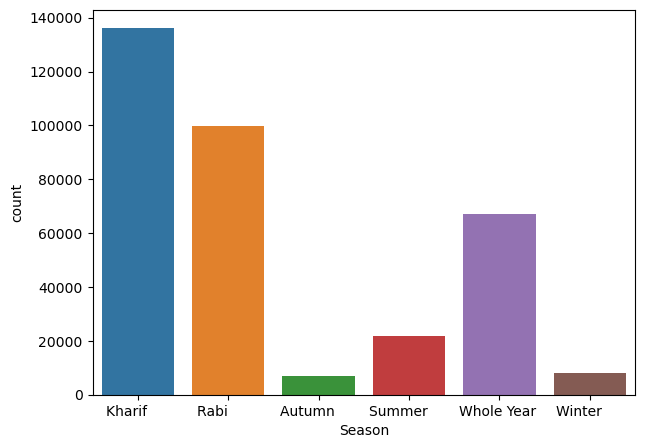

In [24]:
plt.figure(figsize=(7,5),dpi=100)
sns.countplot(data=df,x='Season');

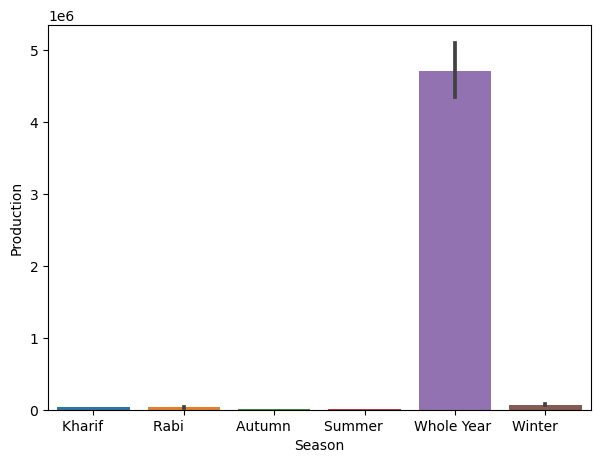

In [25]:
plt.figure(figsize=(7,5),dpi=100)
sns.barplot(data=df,x='Season',y='Production');

**Whole Year season yeilded more crops compared to other seasons in a year.**

In [26]:
state_prod = df.groupby('State')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)

In [27]:
state_prod

,State,Production
17,Kerala,1.297006e+11
31,Tamil Nadu,7.805176e+10
16,Karnataka,6.377280e+10
1,Andhra Pradesh,2.607622e+10
36,West Bengal,8.941179e+09
34,Uttar Pradesh,4.442585e+09
3,Assam,3.637715e+09
10,Goa,2.193998e+09
0,Andaman and Nicobar Island,2.053350e+09
20,Maharashtra,1.878565e+09


**Kerela has the highest productions followed by Tamil Nadu, Karnataka and Andhra Pradesh.**

In [28]:
df.groupby("State").sum()['Production'].nsmallest()

State
Daman and Diu                   59268.0
CHANDIGARH                      89782.0
Laddak                         114584.0
Dadra and Nagar Haveli         337093.0
THE DADRA AND NAGAR HAVELI    2222055.0
Name: Production, dtype: float64

**The bottom 5 states in crop production.**

In [29]:
df.groupby("State").sum()['Production'].nlargest()

State
Kerala            1.297006e+11
Tamil Nadu        7.805176e+10
Karnataka         6.377280e+10
Andhra Pradesh    2.607622e+10
West Bengal       8.941179e+09
Name: Production, dtype: float64

**The top 5 states in crop production.**

In [30]:
df.groupby("Crop").sum()['Production'].nlargest()

Crop
Coconut      3.108048e+11
Sugarcane    7.249507e+09
Rice         2.236428e+09
Wheat        2.007360e+09
Potato       6.323157e+08
Name: Production, dtype: float64

**Coconut is highly produced.**

In [31]:
df.groupby("Crop").sum()['Production'].nsmallest()

Crop
Other Summer Pulses       8394.0
Cardamom                255497.0
Sannhamp                433530.0
Cowpea(Lobia)           745568.0
Other Cereals          1682056.0
Name: Production, dtype: float64

**Other Summer Pulses is the least produced.**

In [32]:
df.groupby(['State','Crop','Crop_Year']).sum()['Production']


State                       Crop      Crop_Year
Andaman and Nicobar Island  Arecanut  2000           7200.0
                                      2001           7300.0
                                      2002           7350.0
                                      2003           6707.0
                                      2004           4781.0
                                                     ...   
West Bengal                 Wheat     2015         788503.0
                                      2016         862712.0
                                      2017         362744.0
                                      2018         337751.0
                                      2019         509970.0
Name: Production, Length: 17731, dtype: float64

In [33]:
df.groupby('Crop_Year')['Production'].sum().reset_index().sort_values(by='Production',ascending=False)

,Crop_Year,Production
14,2011,1.939837e+10
18,2015,1.849115e+10
22,2019,1.842530e+10
21,2018,1.806582e+10
17,2014,1.788990e+10
16,2013,1.720176e+10
12,2009,1.670823e+10
19,2016,1.652594e+10
11,2008,1.627291e+10
20,2017,1.603249e+10


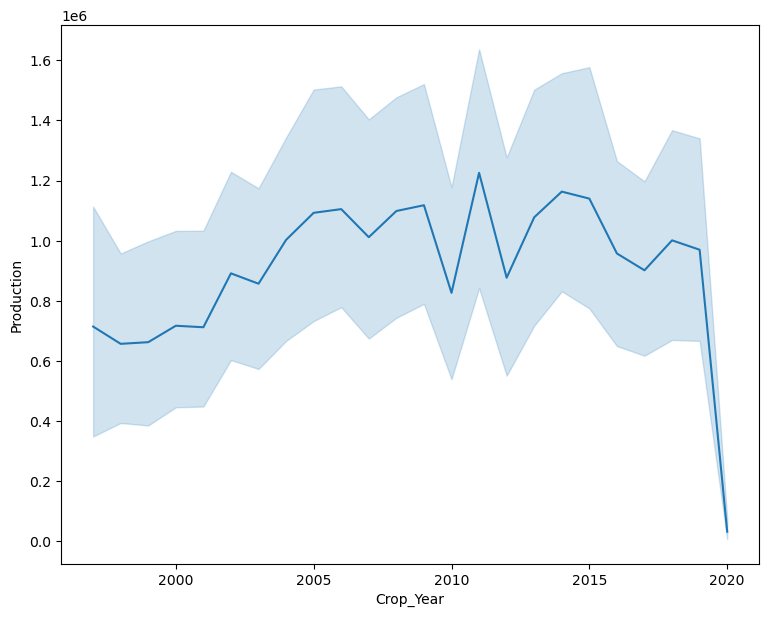

In [34]:
plt.figure(figsize=(9,7),dpi=100)
sns.lineplot(data=df,x='Crop_Year',y='Production');

**2011 was the year which witness the highest production of crops in India and 2020 was the year with the lowest.**

In [35]:
df['Crop_Year'].value_counts().sort_values(ascending = False)

2019    19000
2018    18047
2017    17787
2016    17263
2015    16222
2013    15962
2011    15827
2014    15381
2012    15042
2009    14947
2008    14812
2010    14621
2003    14512
2007    14410
2006    14313
2002    14042
2004    13888
2005    13774
2000    13483
2001    13237
1999    12936
1998    12010
1997     8548
2020      319
Name: Crop_Year, dtype: int64

**2019 was the year which witnessed the highest number of crops cultivated.**

In [36]:
kerala_data = df[df['State'] == 'Kerala']
kerala_data

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
144517,Kerala,ALAPPUZHA,Arecanut,1997,Whole Year,2253.0,1518.0,0.67
144518,Kerala,ALAPPUZHA,Arecanut,1998,Whole Year,2067.0,766.0,0.37
144519,Kerala,ALAPPUZHA,Arecanut,1999,Whole Year,2308.0,1043.0,0.45
144520,Kerala,ALAPPUZHA,Arecanut,2000,Whole Year,2205.0,917.0,0.42
144521,Kerala,ALAPPUZHA,Arecanut,2001,Whole Year,2389.0,792.0,0.33
...,...,...,...,...,...,...,...,...
149382,Kerala,IDUKKI,Wheat,2015,Whole Year,2.0,3.0,1.50
149383,Kerala,IDUKKI,Wheat,2016,Whole Year,1.0,1.0,1.00
149384,Kerala,IDUKKI,Wheat,2017,Whole Year,1.0,1.0,1.00
149385,Kerala,IDUKKI,Wheat,2018,Whole Year,1.4,2.0,1.45


In [37]:
kerala_data.groupby("Crop").sum()['Production'].sort_values(ascending=False)

Crop
Coconut                1.296071e+11
Tapioca                5.892096e+07
Rice                   1.328421e+07
Banana                 1.022445e+07
Sugarcane              4.895608e+06
Arecanut               2.444128e+06
Black pepper           1.157005e+06
Cashewnut              1.061781e+06
Ginger                 6.896350e+05
Cardamom               2.129500e+05
Turmeric               1.601510e+05
Sweet potato           1.363570e+05
Garlic                 9.474300e+04
Potato                 9.119100e+04
Cotton(lint)           6.060200e+04
Groundnut              3.307100e+04
Jowar                  1.519500e+04
Ragi                   1.094400e+04
Arhar/Tur              8.630000e+03
Other Kharif pulses    6.859000e+03
Sesamum                6.007000e+03
Tobacco                3.691000e+03
Other Cereals          1.989000e+03
Small millets          1.188000e+03
Other  Rabi pulses     1.131000e+03
Gram                   1.000000e+03
Maize                  7.420000e+02
Dry chillies           

**KERALA: Coconut (highest produced crop) and Other oil seeds (least produced crop)**

In [38]:
tamilnadu_data = df[df['State'] == 'Tamil Nadu']
tamilnadu_data

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
255243,Tamil Nadu,ARIYALUR,Arecanut,2018,Whole Year,1.0,2.0,2.00
255244,Tamil Nadu,ARIYALUR,Arecanut,2019,Whole Year,1.0,2.0,2.00
255247,Tamil Nadu,COIMBATORE,Arecanut,2004,Whole Year,1574.0,1844.0,1.17
255248,Tamil Nadu,COIMBATORE,Arecanut,2005,Whole Year,1556.0,4469.0,2.87
255249,Tamil Nadu,COIMBATORE,Arecanut,2006,Whole Year,1602.0,3828.0,2.39
...,...,...,...,...,...,...,...,...
273736,Tamil Nadu,VIRUDHUNAGAR,Urad,2017,Rabi,2958.0,1997.0,0.68
273737,Tamil Nadu,VIRUDHUNAGAR,Urad,2018,Kharif,320.0,243.0,0.76
273738,Tamil Nadu,VIRUDHUNAGAR,Urad,2018,Rabi,3234.0,1962.0,0.61
273739,Tamil Nadu,VIRUDHUNAGAR,Urad,2019,Kharif,343.0,288.0,0.84


In [39]:
tamilnadu_data.groupby("Crop").sum()['Production'].sort_values(ascending=False)

Crop
Coconut                7.702440e+10
Sugarcane              6.614381e+08
Rice                   1.321423e+08
Banana                 7.263045e+07
Tapioca                6.740041e+07
Maize                  2.528099e+07
Groundnut              2.288330e+07
Jowar                  7.404793e+06
Cotton(lint)           5.785020e+06
Onion                  4.971196e+06
Ragi                   4.887379e+06
Urad                   3.912409e+06
Guar seed              3.514258e+06
Bajra                  2.948914e+06
Turmeric               2.579682e+06
Moong(Green Gram)      1.671417e+06
Potato                 1.505243e+06
Sesamum                8.345340e+05
Horse-gram             7.922730e+05
Arhar/Tur              7.853880e+05
Small millets          6.220360e+05
Cashewnut              6.006740e+05
Dry chillies           5.771450e+05
Sunflower              3.969670e+05
Other Kharif pulses    2.547760e+05
Sweet potato           2.511590e+05
Ginger                 1.642740e+05
Arecanut               

**TAMIL NADU: Coconut (highest produced crop) and Rapeseed and Mustard (least produced crop)**

<AxesSubplot:xlabel='Production', ylabel='Crop'>

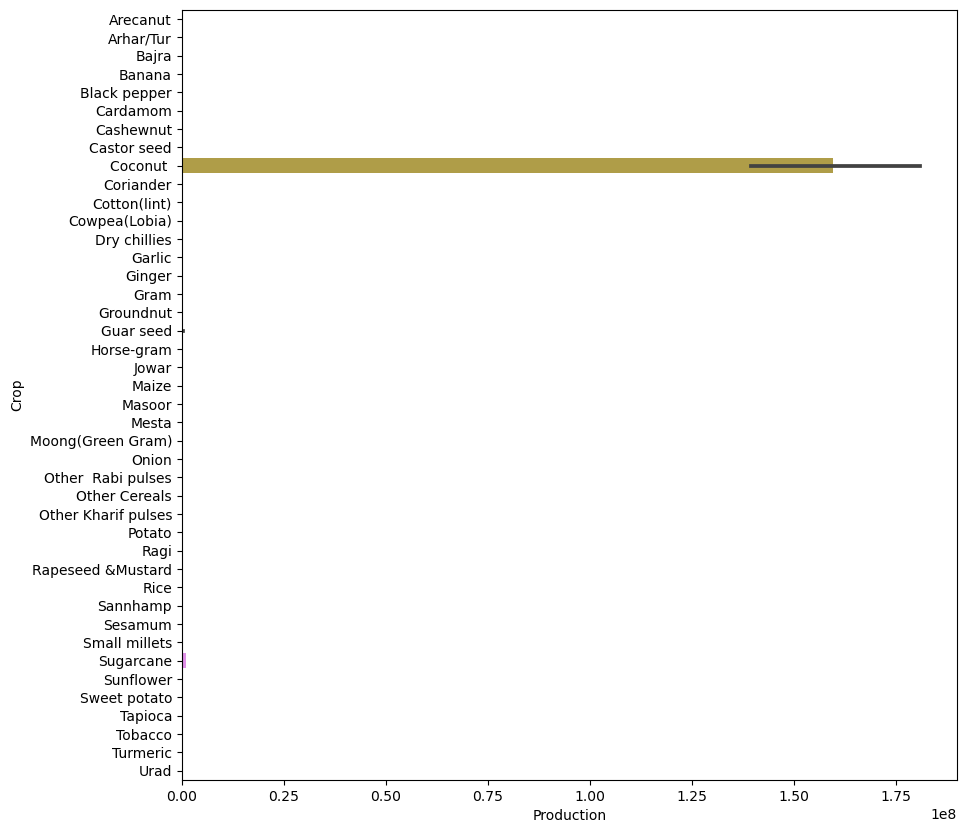

In [40]:
plt.figure(figsize=(10,10),dpi=100)
sns.barplot(tamilnadu_data,y='Crop',x='Production')

In [41]:
df.groupby('Season').sum()['Production'].nlargest()

Season
Whole Year     3.165636e+11
Kharif         5.622335e+09
Rabi           3.150455e+09
Winter         5.877505e+08
Summer         2.437629e+08
Name: Production, dtype: float64

 **Whole year witnessed the most number of productions.**

In [42]:
df.groupby('Season').sum()['Production'].nsmallest()

Season
Autumn         8.464151e+07
Summer         2.437629e+08
Winter         5.877505e+08
Rabi           3.150455e+09
Kharif         5.622335e+09
Name: Production, dtype: float64

**Autumn witnessed the least number of productions.**

In [43]:
df['Crop'].value_counts()

Rice                     21573
Maize                    20335
Moong(Green Gram)        14851
Urad                     14389
Sesamum                  12744
Groundnut                12515
Wheat                    11208
Rapeseed &Mustard        10919
Sugarcane                10826
Arhar/Tur                10764
Potato                   10729
Onion                    10621
Gram                     10330
Jowar                     9682
Dry chillies              8890
Bajra                     8091
Peas & beans (Pulses)     7179
Sunflower                 7104
Small millets             6859
Cotton(lint)              6318
Masoor                    6296
Barley                    5808
Linseed                   5793
Ragi                      5725
Sweet potato              5656
Other Kharif pulses       5590
Turmeric                  5571
Horse-gram                5294
Garlic                    5202
Coriander                 4954
Soyabean                  4953
Other  Rabi pulses        4728
Castor s

* **Rice is cultivated the most followed by Maize, Moong and Urad.**
* **Other summer pulses are the least cultivated crop in India in the period of 1997-2020.**

In [44]:
india_data=df.groupby('Crop').sum()['Production'].sort_values(ascending = False)
india_data

Crop
Coconut                  3.108048e+11
Sugarcane                7.249507e+09
Rice                     2.236428e+09
Wheat                    2.007360e+09
Potato                   6.323157e+08
Cotton(lint)             4.839080e+08
Maize                    4.440007e+08
Jute                     2.304238e+08
Banana                   2.267633e+08
Soyabean                 2.117965e+08
Bajra                    2.011004e+08
Groundnut                1.638321e+08
Gram                     1.602564e+08
Rapeseed &Mustard        1.498361e+08
Jowar                    1.492559e+08
Onion                    1.333439e+08
Tapioca                  1.309181e+08
Arhar/Tur                6.126078e+07
Ragi                     4.425372e+07
Niger seed               4.064363e+07
Arecanut                 3.929935e+07
Urad                     3.788802e+07
Barley                   3.506933e+07
Moong(Green Gram)        3.239899e+07
Guar seed                3.132193e+07
Castor seed              2.794935e+07
Dry chi

**Coconut is the highly produced crop in India over the period of 24 years followed by sugarcane, rice and wheat.**